# Machine Learning Unsurpervising Learning with Sklearn

## Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data set source:  
+ https://archive.ics.uci.edu/ml/datasets
* read data
+ size of data

In [9]:
countries = pd.read_csv('countries.csv', 
                        sep ='\t')

In [10]:
countries.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [11]:
countries.shape

(245, 4)

## View data:
+ types
+ Nan Values

In [12]:
countries.dtypes

country       object
latitude     float64
longitude    float64
name          object
dtype: object

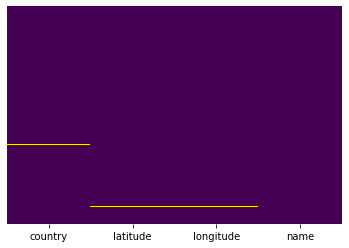

In [14]:
sns.heatmap(countries.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [15]:
countries.isnull().sum()

country      1
latitude     1
longitude    1
name         0
dtype: int64

### Drop Nan

In [16]:
countries.dropna(inplace = True)

In [18]:
countries.isnull().sum().sum()

0

In [17]:
countries.shape

(243, 4)

### Viz longitude and latitude

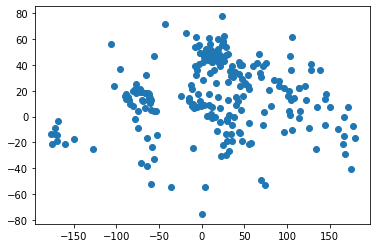

In [19]:
plt.scatter(countries['longitude'], countries['latitude'])
plt.show()

## working with Kmeans

In [25]:
# select features
xfeature = countries[['longitude', 'latitude']]

In [21]:
from sklearn.cluster import KMeans

In [26]:
# asuming k = 7

km = KMeans(n_clusters=7)

In [27]:
#fit and predict
clusters = km.fit_predict(xfeature)

In [28]:
countries['cluster_label'] = clusters
countries.head()

,country,latitude,longitude,name,cluster_label
0,AD,42.546245,1.601554,Andorra,5
1,AE,23.424076,53.847818,United Arab Emirates,6
2,AF,33.939110,67.709953,Afghanistan,6
3,AG,17.060816,-61.796428,Antigua and Barbuda,0
4,AI,18.220554,-63.068615,Anguilla,0


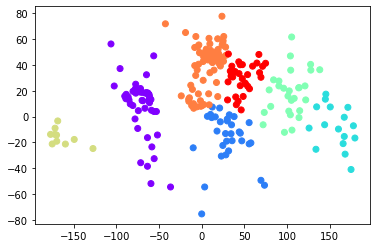

In [29]:
plt.scatter(countries['longitude'], countries['latitude'], cmap='rainbow', c= countries['cluster_label'])
plt.show()

### Scale data

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
x_sc = StandardScaler().fit_transform(xfeature)

In [34]:
km2 = KMeans(n_clusters=7)
new_clusters = km2.fit_predict(x_sc)

In [35]:
df_sc = countries
df_sc['new_clusters'] = new_clusters
df_sc.head()

,country,latitude,longitude,name,cluster_label,new_clusters
0,AD,42.546245,1.601554,Andorra,5,5
1,AE,23.424076,53.847818,United Arab Emirates,6,2
2,AF,33.939110,67.709953,Afghanistan,6,2
3,AG,17.060816,-61.796428,Antigua and Barbuda,0,0
4,AI,18.220554,-63.068615,Anguilla,0,0


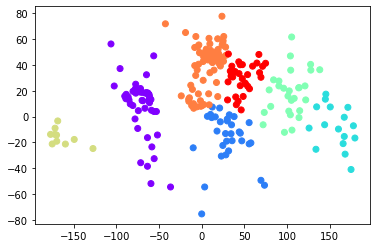

In [36]:
plt.scatter(countries['longitude'], countries['latitude'], cmap='rainbow', c= df_sc['cluster_label'])
plt.show()

# Customers segmentation

## New data source:
+ [jewwllery.csv](https://raw.githubusercontent.com/Jcharis/Python-Machine-Learning/master/Unsupervised_Machine_Learning/jewellery.csv)

In [37]:
df_customers = pd.read_csv('https://raw.githubusercontent.com/Jcharis/Python-Machine-Learning/master/Unsupervised_Machine_Learning/jewellery.csv')

## View:
+ structure
+ size
+ types
+ Null values
+ statistics
+ viz data

In [38]:
df_customers.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [39]:
df_customers.shape

(505, 4)

In [40]:
df_customers.dtypes

Age                int64
Income             int64
SpendingScore    float64
Savings          float64
dtype: object

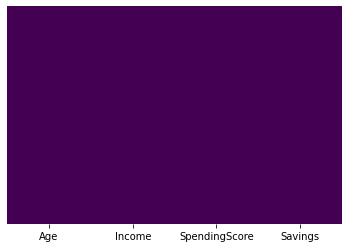

In [43]:
sns.heatmap(df_customers.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [44]:
df_customers.isnull().sum().sum()

0

In [41]:
df_customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,505.0,59.019802,24.140043,17.0,34.000000,59.000000,85.000000,97.0
Income,505.0,75513.291089,35992.922184,12000.0,34529.000000,75078.000000,107100.000000,142000.0
SpendingScore,505.0,0.505083,0.259634,0.0,0.304792,0.368215,0.768279,1.0
Savings,505.0,11862.455867,4949.229253,0.0,6828.709702,14209.932802,16047.268331,20000.0


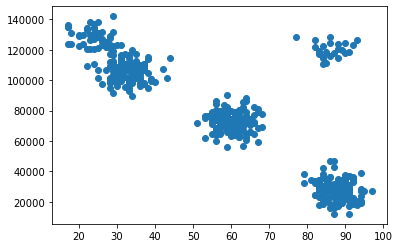

In [45]:
#simple plot
plt.scatter(df_customers['Age'], df_customers['Income'])

### Find optimal K
+ Elbow method
+ Silhouette Method

**How to choose the best k - number for your cluster**
+ Elbow method
+ Silhoutte score
+ +1 : close to 1 means that datapoint is inside it own cluster
+ 0 : close to 0 means it is close to a cluster boundary
+ -1 : close to 1 means it is in a wrong cluster

In [48]:
# elbow method
sum_dist = []
k_range = range(1, 15)
for i in k_range:
    km3 = KMeans(n_clusters=i)
    km3.fit(df_customers)
    sum_dist.append(km3.inertia_)

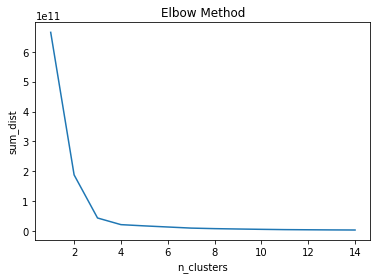

In [50]:
plt.plot(k_range, sum_dist)
plt.xlabel('n_clusters')
plt.ylabel('sum_dist')
plt.title('Elbow Method')
plt.show()

In [51]:
from sklearn.metrics import silhouette_score, silhouette_samples

### Using silhoutte for optimal n_clusters

In [60]:
range_n_clusters = [2,3,4,5,6]
for n_clusters in range_n_clusters:
    km4 = KMeans(n_clusters=n_clusters)
    preds = km4.fit_predict(df_customers)
    centers = km4.cluster_centers_
    score = silhouette_score(df_customers, preds)
    print('For n_cluster= {}, silhouette score is {})'.format(n_clusters,score))

For n_cluster= 2, silhouette score is 0.6547312337772452)
For n_cluster= 3, silhouette score is 0.7393168523275075)
For n_cluster= 4, silhouette score is 0.7207226008574877)
For n_cluster= 5, silhouette score is 0.6382039175207863)
For n_cluster= 6, silhouette score is 0.5776832261943947)


#### Narrative  
+ optimal n_clusters 3 and 4

In [61]:
# with n_clusters = 4

km4 = KMeans(n_clusters=4)
preds = km4.fit_predict(df_customers)

In [62]:
df_customers['clusters_label'] = preds
df_customers.head()

,Age,Income,SpendingScore,Savings,clusters_label
0,58,77769,0.791329,6559.829923,1
1,59,81799,0.791082,5417.661426,1
2,62,74751,0.702657,9258.992965,1
3,59,74373,0.765680,7346.334504,1
4,87,17760,0.348778,16869.507130,2


In [63]:
df_customers['clusters_label'].unique()

array([1, 2, 0, 3])

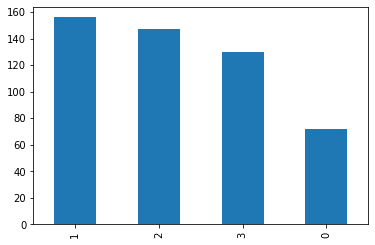

In [67]:
df_customers['clusters_label'].value_counts().plot(kind='bar')

In [68]:
df_customers['clusters_label'].value_counts()

1    156
2    147
3    130
0     72
Name: clusters_label, dtype: int64

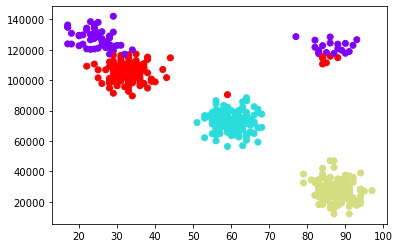

In [69]:
plt.scatter(df_customers['Age'], df_customers['Income'], c= df_customers['clusters_label'], cmap = 'rainbow')

In [77]:
df_customers[df_customers['clusters_label']==0]

,Age,Income,SpendingScore,Savings,clusters_label
5,29,131578,0.847034,3535.514352,0
15,92,122879,0.060724,13709.670275,0
19,88,120678,0.063273,14264.473847,0
21,84,122696,0.082187,13809.734087,0
24,89,119697,0.091679,16215.399077,0
...,...,...,...,...,...
466,18,123718,0.806553,4420.445821,0
468,32,117050,0.311356,14310.546207,0
487,26,123005,0.984526,4371.234733,0
496,22,132948,0.889800,2839.786357,0


In [78]:
# viz with labels
cust0= df_customers[df_customers['clusters_label']==0]
cust1= df_customers[df_customers['clusters_label']==1]
cust2= df_customers[df_customers['clusters_label']==2]
cust3= df_customers[df_customers['clusters_label']==3]

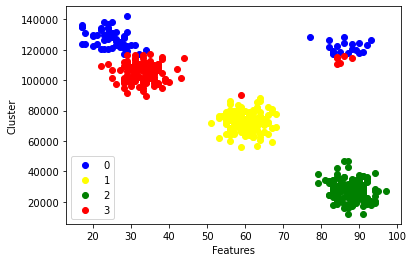

In [88]:
plt.scatter(cust0['Age'], cust0['Income'], color = 'blue', label= 0)
plt.scatter(cust1['Age'], cust1['Income'], color = 'yellow', label =1)
plt.scatter(cust2['Age'], cust2['Income'], color = 'green', label =2)
plt.scatter(cust3['Age'], cust3['Income'], color = 'red', label =3)
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.legend()
plt.show()

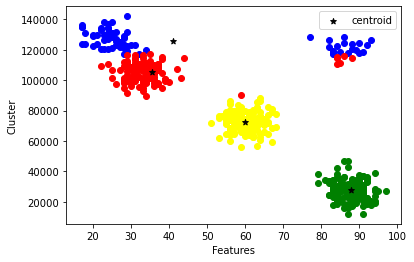

In [87]:
plt.scatter(cust0['Age'], cust0['Income'], color = 'blue')
plt.scatter(cust1['Age'], cust1['Income'], color = 'yellow')
plt.scatter(cust2['Age'], cust2['Income'], color = 'green')
plt.scatter(cust3['Age'], cust3['Income'], color = 'red')
plt.scatter(km4.cluster_centers_[:, 0],
           km4.cluster_centers_[:, 1],
           color = 'black', 
           marker='*',
           label = 'centroid')

plt.xlabel('Features')
plt.ylabel('Cluster')
plt.legend()
plt.show()

## Using Silhouette Plot
+ The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

In [89]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
def silhouette_plot(X, y, n_clusters, ax=None):
	if ax is None:
		ax = plt.gca()
		# Compute the silhouette scores for each sample
		silhouette_avg = silhouette_score(X, y)
		sample_silhouette_values = silhouette_samples(X, y)
		y_lower = padding = 2
		for i in range(n_clusters):
	# Aggregate the silhouette scores for samples belonging to
			ith_cluster_silhouette_values = sample_silhouette_values[y == i]
			ith_cluster_silhouette_values.sort()
			size_cluster_i = ith_cluster_silhouette_values.shape[0]
			y_upper = y_lower + size_cluster_i
			color = cm.nipy_spectral(float(i) / n_clusters)
			ax.fill_betweenx(np.arange(y_lower, y_upper),
							0,ith_cluster_silhouette_values,
							facecolor=color,
							edgecolor=color,
							alpha=0.7)
			# Label the silhouette plots with their cluster numbers at the middle
			ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))
			# Compute the new y_lower for next plot
			y_lower = y_upper + padding
		ax.set_xlabel("The silhouette coefficient values")
		ax.set_ylabel("Cluster label")
		# The vertical line for average silhoutte score of all the values
		ax.axvline(x=silhouette_avg, c='r', alpha=0.8, lw=0.8, ls='-')
		ax.annotate('Average',
					xytext=(silhouette_avg, y_lower * 1.025),
					xy=(0, 0),
					ha='center',
					alpha=0.8,
					c='r')
		ax.set_yticks([]) # Clear the yaxis labels / ticks
		ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
		ax.set_ylim(0, y_upper + 1)
		ax.set_xlim(-0.075, 1.0)
		return ax

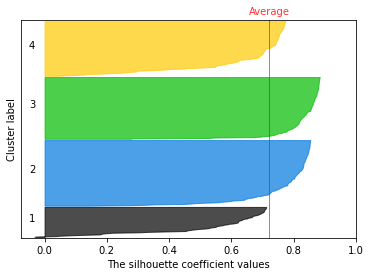

In [93]:
silhouette_plot(df_customers, preds, 4, ax =None)

**DBSCAN** stands for Density-Based Spatial Clustering of Applications with Noise  
It refers to an unsupervised learning methods that identify distinctive groups/clusters in the data, based on the idea that a cluster in data space is a contiguous region of high point density, separated from other such clusters by contiguous regions of low point density.(kdnuggets)
DBSCAN is a base algorithm for density-based clustering.  

It can discover clusters of different shapes and sizes from a large amount of data  
+ Usefulness
+ Unsupervised ML
+ Outlier Detection
+ Noise detection

Terms  
The DBSCAN algorithm uses two parameters:   

+ eps (ε): A distance measure that will be used to locate the points in the neighborhood of any point.  

+ minPts: The minimum number of points (a threshold) clustered together for a region to be considered dense.  

+ minPt >= Dimensions of dataset + 1
Core point — This is a point that has at least m points within distance n from itself.

+ Border — This is a point that has at least one Core point at a distance n.
Noise — This is a point that is neither a Core nor a Border. And it has less than m points within distance n from itself. 
These parameters can be understood if we explore two concepts called Density Reachability and Density Connectivity.

Reachability in terms of density establishes a point to be reachable from another if it lies within a particular distance (eps) from it.

Connectivity, on the other hand, involves a transitivity based chaining-approach to determine whether points are located in a particular cluster. For example, p and q points could be connected if p->r->s->t->q, where a->b means b is in the neighborhood of a.

### scale data

In [94]:
df_cust_sc = StandardScaler().fit_transform(df_customers)

In [95]:
# model DBSCAM
from sklearn.cluster import DBSCAN

In [96]:
dbscan = DBSCAN(eps=0.3, min_samples=10)

In [97]:
#fit model
y_clust_dbscan = dbscan.fit_predict(df_cust_sc)

In [98]:
df_customers['dbscan_label'] = y_clust_dbscan
df_customers.head()

,Age,Income,SpendingScore,Savings,clusters_label,dbscan_label
0,58,77769,0.791329,6559.829923,1,0
1,59,81799,0.791082,5417.661426,1,0
2,62,74751,0.702657,9258.992965,1,0
3,59,74373,0.765680,7346.334504,1,0
4,87,17760,0.348778,16869.507130,2,1


In [99]:
df_customers['dbscan_label'].unique()

array([ 0,  1,  3, -1,  2], dtype=int64)

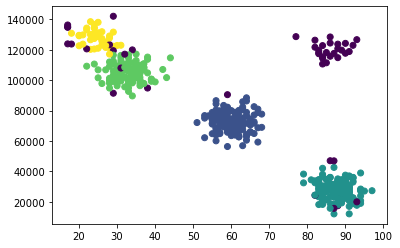

In [100]:
plt.scatter(df_customers['Age'], df_customers['Income'], c= df_customers['dbscan_label'])

In [101]:
#Number of clusters
len(df_customers['dbscan_label'].unique())

5

In [103]:
# noise 
list(dbscan.labels_).count(-1)

48

**Clustering using BIRCH**
+ BIRCH stands for Balanced Iterative Reducing and Clustering using Hierarchies
+ It is a hierarchical clustering algorithm.
+ It provides a memory-efficient clustering method for large datasets.
+ Very good for large dataset
+ Clustering is conducted without scanning all points in a dataset.
+ The BIRCH algorithm creates Clustering Features (CF) Tree for a given dataset and CF contains the number of sub-clusters that holds only a necessary part of the data. Thus the method does not require to memorize the entire dataset.  

**Terms**

+ branching_factor: it defines the number of sub-clusters and
+ threshold: it sets the limit between the sample and sub-cluster.  

**Benefit**

+ Useful for large dataset
+ BIRCH can work with any given amount of memory, and the I/O complexity is a little more than one scan of data.

In [105]:
df = pd.read_csv('https://raw.githubusercontent.com/Jcharis/Python-Machine-Learning/master/Unsupervised_Machine_Learning/jewellery.csv')

In [104]:
from sklearn.cluster import Birch

In [106]:
brich_model = Birch(branching_factor=100, n_clusters=4)
brich_model.fit(df)

Birch(branching_factor=100, n_clusters=4)

In [107]:
y_brich = brich_model.predict(df)

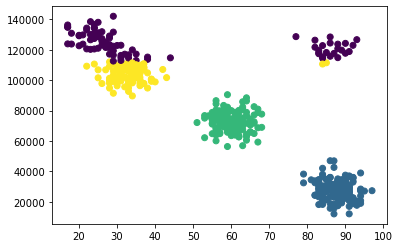

In [109]:
plt.scatter(df['Age'], df['Income'], c= brich_model.labels_)

### **Clustering using Hierarchical Clustering**
+ Hierarchical Clustering: the process of building a hierarchy or ordering of clusters till only one cluster is left  

**Types of Hierarchical Clustering**
+ Additive(Agglomerative) hierarchical clustering

  + Agglomerate (merge or join)
    + Assign each point to a cluster
    + Merge/Join closes pairs of clusters into one
    + Repeat until you have a single cluster
    + You keep on adding or joining clusters
  + Divisive hierarchical clustering
    + Opposite of Additive
    + Start with a single large cluster
    + Divide/Split the farthest point in the cluster
    + Repeat until each cluster only contains a single data point

**Terms**
+ Similarity Distance
+ Proximity Matrix: it stores the distances between each point
+ Dendogram: used to find the number of clusters
    + A dendrogram is a tree-like diagram that records the sequences of merges or splits.
    + The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.
    
**Agglomerative Hierarchical Clustering**
+ Merging clusters
+ Dendogram to detect n_clusters to use and end at

In [124]:
df = pd.read_csv('https://raw.githubusercontent.com/Jcharis/Python-Machine-Learning/master/Unsupervised_Machine_Learning/jewellery.csv')

In [110]:
# Normalize data
from sklearn.preprocessing import Normalizer

In [125]:
norm = Normalizer().fit_transform(df)
df_norm = pd.DataFrame(norm, columns = df.columns)
df.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [112]:
# dectenting numbers of clusters
import scipy.cluster.hierarchy as sch

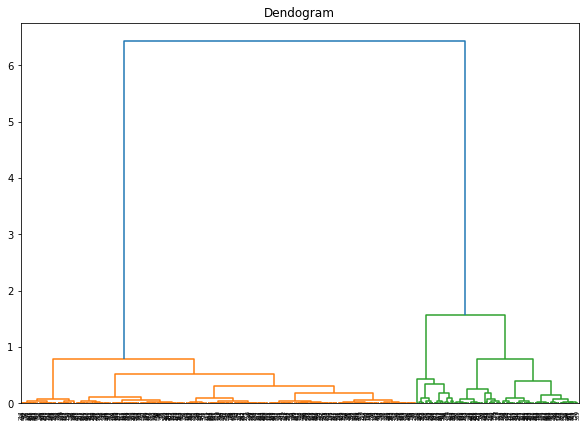

In [113]:
plt.figure(figsize= (10,7))
plt.title('Dendogram')
dend = sch.dendrogram(sch.linkage(df_norm, method='ward'))

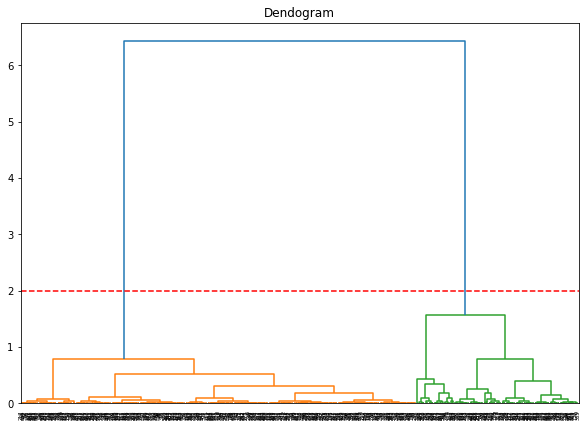

In [114]:
plt.figure(figsize= (10,7))
plt.title('Dendogram')
dend = sch.dendrogram(sch.linkage(df_norm, method='ward'))
plt.axhline(y=2,color='r',linestyle='--')

In [115]:
# Building model
from sklearn.cluster import AgglomerativeClustering

In [132]:
agglo = AgglomerativeClustering(n_clusters= 4)

In [133]:
y_clus_h = agglo.fit_predict(df_norm)

In [134]:
df_norm['cluster_label'] = y_clus_h

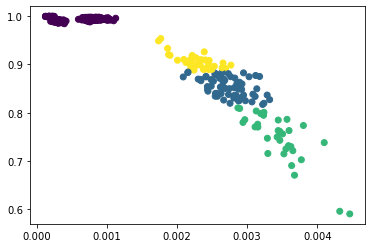

In [135]:
plt.scatter(df_norm['Age'], df_norm['Income'], c=df_norm['cluster_label'])

### END